# EISpy Example

* See https://github.com/MSSLSolar/EISpy/blob/master/examples/plot_eis.py

First, import required packages.

In [1]:
import os
import eispy.cube
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import numpy as np
from sunpy.net import Fido, attrs

Now add the downloaded file. 

In [2]:
downloaded_files = "./data/eis_l0_20100723_143210.fits"

Read in the downloaded file.

**Note:** This raises several warnings because the fits header doesn't fully comply with the fits standard. 

In [3]:
observation = eispy.cube.read(downloaded_files)

 [astropy.io.fits.verify]
Set MJD-OBS to 55400.605671 from DATE-OBS'. [astropy.wcs.wcs]


The result of the above is an `EISObservation` object. 

In [4]:
print(observation)

In [5]:
print(observation.wavelengths)

['FE XI 180.400', 'CA XV 182.100', 'FE X 184.330', 'FE VIII 185.210', 'FE XII 186.750', 'FE XI 188.400', 'CA XVII 192.470', 'CA XIV 194.100', 'FE XII 195.120', 'FE IX 197.860', 'CA XV 201.050', 'FE XIII 202.040', 'FE XIII 203.830', 'CA XVI 208.500', 'FE XXIV 255.000', 'S XIII 256.480', 'SI X 258.370', 'FE XVI 262.980', 'S X 264.300', 'FE XIV 270.520', 'SI VII 275.400', 'MG V 276.300', 'MG VII 278.400', 'MG VII 280.740', 'FE XV 284.160']


Select some wavelengths to plot. 

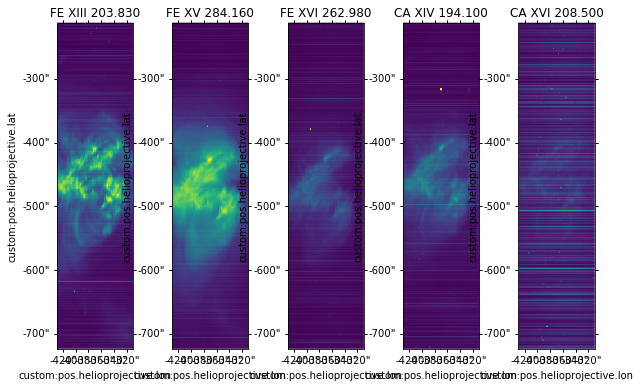

In [6]:
wlens = ['FE XIII 203.830', 'FE XV 284.160', 'FE XVI 262.980', 'CA XIV 194.100', 'CA XVI 208.500']
fig = plt.figure(figsize=(10, 6))
for i, wlen in enumerate(wlens):
    intensity = observation[wlen].total_intensity
    ax = fig.add_subplot(1, len(wlens), i + 1, projection=intensity.wcs)
    intensity.plot(axes=ax, norm=mcolor.LogNorm())
    ax.set_title(wlen)

    # Correct the axes limits, to have aspect 1 and correct way round
    xlim = ax.get_xlim()
    ax.set_xlim(xlim[1], xlim[0])
    cdelt = intensity.wcs.wcs.cdelt
    ax.set_aspect(np.abs(cdelt[1] / cdelt[0]))

    ax.set_xlabel('')
    ax.set_ylabel('')

# L1 Example

Level 1 calibration pwerformed in SSWIDL using the `eis_prep` routine. 

```idl
IDL> filename = './data/eis_l1_20100723_143210.fits'
IDL> eis_prep, filename, /default, /save, /retain, /quiet
```

In [7]:
downloaded_files = "./data/eis_l1_20100723_143210.fits"

In [8]:
observation = eispy.cube.read(downloaded_files)

 [astropy.io.fits.verify]
Set MJD-OBS to 55400.605671 from DATE-OBS'. [astropy.wcs.wcs]


In [9]:
print(observation)

In [10]:
print(observation.wavelengths)

['FE XI 180.400', 'CA XV 182.100', 'FE X 184.330', 'FE VIII 185.210', 'FE XII 186.750', 'FE XI 188.400', 'CA XVII 192.470', 'CA XIV 194.100', 'FE XII 195.120', 'FE IX 197.860', 'CA XV 201.050', 'FE XIII 202.040', 'FE XIII 203.830', 'CA XVI 208.500', 'FE XXIV 255.000', 'S XIII 256.480', 'SI X 258.370', 'FE XVI 262.980', 'S X 264.300', 'FE XIV 270.520', 'SI VII 275.400', 'MG V 276.300', 'MG VII 278.400', 'MG VII 280.740', 'FE XV 284.160']


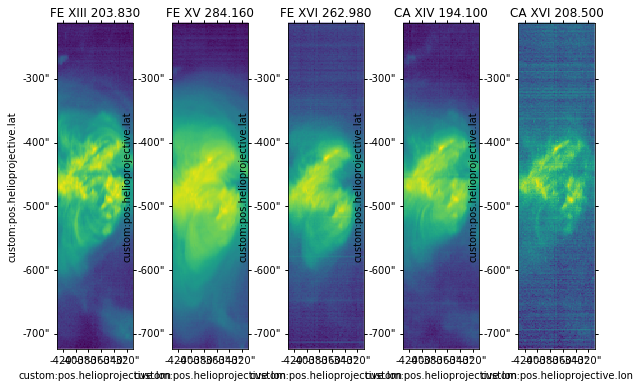

In [11]:
wlens = ['FE XIII 203.830', 'FE XV 284.160', 'FE XVI 262.980', 'CA XIV 194.100', 'CA XVI 208.500']
fig = plt.figure(figsize=(10, 6))
for i, wlen in enumerate(wlens):
    intensity = observation[wlen].total_intensity
    ax = fig.add_subplot(1, len(wlens), i + 1, projection=intensity.wcs)
    intensity.plot(axes=ax, norm=mcolor.LogNorm())
    ax.set_title(wlen)

    # Correct the axes limits, to have aspect 1 and correct way round
    xlim = ax.get_xlim()
    ax.set_xlim(xlim[1], xlim[0])
    cdelt = intensity.wcs.wcs.cdelt
    ax.set_aspect(np.abs(cdelt[1] / cdelt[0]))

    ax.set_xlabel('')
    ax.set_ylabel('')